##### **Importing the libraries**

In [54]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

##### **Load the dataset**

In [55]:
df = pd.DataFrame(pd.read_csv("total_data_na.csv"))

##### **Removing null values**

In [56]:
mean_values = df.apply(pd.to_numeric, errors='coerce').mean()

for col in df.columns:
    df[col] = df[col].replace('-', mean_values[col])

##### **Encode players name into numeric**

In [57]:
selected_features = ['Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[selected_features])

##### **Applying kmeans and make clusters**

In [67]:
for i in range(1,10):
    if i%2 != 0:
        kmeans = KMeans(i,random_state=0,n_init="auto")
        clusters = kmeans.fit_predict(scaled_features)
        df["cluster"] = clusters

##### **Graph Formation**

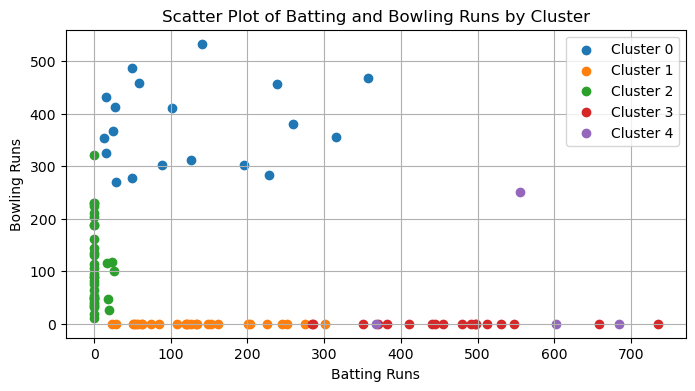

In [68]:
plt.figure(figsize=(8, 4))
for cluster in range(5):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['Runs.x'], cluster_data['Runs.y'], label=f'Cluster {cluster}')

plt.xlabel('Batting Runs')
plt.ylabel('Bowling Runs')
plt.title('Scatter Plot of Batting and Bowling Runs by Cluster')
plt.legend()
plt.grid(True)
plt.show()

##### **Creating Top Order Team**

In [139]:
# Select players for different roles based on cluster memberships
top_order_batsmen = df[df['cluster'] == 0].sample(2)
middle_order_batsmen = df[df['cluster'] == 1].sample(4)
all_rounders = df[df['cluster'] == 2].sample(3)
bowlers = df[df['cluster'] == 3].sample(3)

# Combine selected players into a balanced team
balanced_team = pd.concat([top_order_batsmen, middle_order_batsmen, all_rounders, bowlers])

print(balanced_team)


                PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  \
24       Deepak Chahar     12       4   1      50  39  16.66   29  172.41   
64       Piyush Chawla     15       7   3      27  12   6.75   34   79.41   
68      Rahul Tripathi     12      12   3     226  80  25.11  167  135.32   
23        David Miller      3       3   1      74  26     37   64  115.62   
36        Ishan Kishan     14      12   0     275  62  22.91  184  149.45   
65        Prithvi Shaw      9       9   0     245  65  27.22  160  153.12   
137      Shahbaz 0deem      0       0   0       0   0      0    0    0.00   
131  Mustafizur Rahman      0       0   0       0   0      0    0    0.00   
117        Junior Dala      0       0   0       0   0      0    0    0.00   
28          Evin Lewis     13      13   0     382  65  29.38  276  138.40   
77        Sanju Samson     15      15   1     441  92   31.5  320  137.81   
75        Rohit Sharma     14      14   2     286  94  23.83  215  133.02   